In [1]:
# takes 5m for 2m records. Perform experiments using trained probabilities.

# todo:

# next steps:
# acbl_hand_records_evaluation_experiments.ipynb creates acbl_hand_records_evaluated.pkl
# merge-hand-records.ipynb merges acbl and tcg standardized hand records?

# previous steps:
# acbl_hand_records_dd_train_probabilities_fastai.ipynb creates model to predict expected probabilites of contracts.
# acbl_hand_records_dd_experiments.ipynb creates acbl_hand_records_dd.pkl

# Requirements
# https://github.com/Afwas/python-dds with some of my mods.
# If pickle errors: pip install --upgrade pandas

In [2]:
import pandas as pd
import pathlib
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.display import display # needed to define display() method in vscode
import sys

In [3]:
sys.path.append(str(pathlib.Path.cwd().parent.joinpath('mlBridgeLib')))
sys.path
import mlBridgeLib

In [4]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [5]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')
savedModelsPath = acblPath.joinpath('SavedModels')
savedModelsPath.mkdir(parents=True, exist_ok=True)

In [6]:
# takes 30s
# read model parameters
acbl_hand_records_dd_train_probabilities_filename = 'acbl_hand_records_dd_train_probabilities.pkl'
print(f'Reading model parameters from file:{acbl_hand_records_dd_train_probabilities_filename}')
acbl_hand_records_dd_train_probabilities_file = acblPath.joinpath(acbl_hand_records_dd_train_probabilities_filename)
augmented_df,df,valid_idx,test_df,y_names,cont_names,cat_names = pd.read_pickle(acbl_hand_records_dd_train_probabilities_file)

Reading model parameters from file:acbl_hand_records_dd_train_probabilities.pkl


In [7]:
# takes 10s
saved_model_filename = 'trained_probabilities_all_contracts.pkl'
print(f'Reading model from file:{saved_model_filename}')
saved_model_file = savedModelsPath.joinpath(saved_model_filename)
learn = pd.read_pickle(saved_model_file)

Reading model from file:trained_probabilities_all_contracts.pkl


In [8]:
def AppendPredictionsToDF(df, preds):
    valid_idx = df.index
    df_preds = pd.concat([df,pd.DataFrame(preds,index=valid_idx,columns=[n+'_pred' for n in y_names])],axis='columns')
    for n in y_names:
        df_preds.loc[valid_idx,n+'_var'] = df_preds[n]-df_preds[n+'_pred']
        # todo: use SL_Max_NS column as an index into 'DD_N_?', 'DD_N_?_pred', 'DD_N_?_var' to get max for each row
        #for sl in ['SL_Max_NS','SL_Max_EW']:
        #df_preds.loc[valid_idx,n+'_actual'] = df_preds.loc[valid_idx].apply(lambda r: r[[n+'_avg'][int(r[sl])]],axis='columns')
        #df_preds.loc[valid_idx,n+'_pred'] = df_preds.loc[valid_idx].apply(lambda r: r[[n+'_avg_pred'][int(r[sl])]],axis='columns')
        #df_preds.loc[valid_idx,n+'_avg_var'] = df_preds.loc[valid_idx,n+'_avg_actual']-df_preds.loc[valid_idx,n+'_avg_pred']
    return df_preds

In [9]:
# takes 5s
# get validation dataset predictions
preds, actuals = learn.get_preds() # defaults to learn.dls.valid
len(preds), len(actuals), preds, actuals

(40415,
 40415,
 tensor([[ 0.0013,  0.0003, -0.0009,  ..., -0.0032,  0.0030,  0.0027],
         [-0.0026,  0.0007,  0.0020,  ..., -0.0007,  0.0051, -0.0159],
         [ 0.0018, -0.0012,  0.0280,  ...,  0.0037,  0.0024,  0.0072],
         ...,
         [ 0.0005,  0.0044, -0.0094,  ..., -0.0045, -0.0011,  0.0011],
         [-0.0020, -0.0073,  0.0053,  ...,  0.0014, -0.0016, -0.0062],
         [-0.0006,  0.0035, -0.0070,  ..., -0.0005, -0.0004,  0.0041]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]))

In [10]:
pd.concat([pd.DataFrame(actuals),pd.DataFrame(preds)],axis='columns')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.00,0.01,0.00,-0.00,0.00,0.00,0.00,0.07,0.84,0.08,0.02,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,0.07,0.52,0.35,0.05,-0.00,0.00,-0.00,-0.00,0.01,-0.00,-0.00,0.00,-0.00,-0.01,0.04,0.80,0.20,-0.01,-0.01,0.00,-0.00,-0.00,0.00,-0.01,-0.00,-0.00,-0.00,0.00,0.01,0.42,0.54,0.04,-0.01,0.01,-0.01,-0.01,-0.01,-0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.02,-0.01,0.02,0.00,-0.04,0.09,0.19,0.09,0.31,0.28,0.11,-0.04,-0.01,-0.01,0.00,-0.01,0.27,0.54,0.08,0.03,0.01,-0.00,0.01,0.02,0.00,0.00,0.00,-0.03,0.02,0.04,-0.02,0.10,0.82,0.11,-0.01,0.00,0.00,-0.00,0.01,-0.00,-0.00,-0.01,0.00,0.01,0.21,0.78,0.01,-0.01,-0.01,0.02,0.00,0.01,-0.00,-0.00,0.00,-0.00,0.01,-0.02
2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.21,-0.00,0.00,-0.00,0.00,0.00,0.01,0.00,0.00,0.10,0.63,0.23,0.01,0.01,0.02,-0.01,-0.01,0.01,0.00,0.00,-0.00,0.01,0.00,0.66,0.37,0.01,-0.02,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.01,0.01,0.07,0.50,0.37,0.05,0.02,-0.01,0.00,0.00,0.01,0.01,0.00,0.01,-0.01,0.37,0.40,0.09,0.06,0.05,0.00,0.00,0.01
3,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,...,0.46,-0.00,-0.00,-0.00,0.00,0.01,0.01,0.26,0.33,0.28,0.12,-0.01,0.00,-0.00,0.01,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.01,0.02,0.24,0.71,0.02,0.02,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.01,0.00,0.00,-0.01,0.01,0.02,0.72,0.25,0.01,-0.01,-0.00,0.00,0.00,-0.00,0.03,0.17,0.38,0.40,0.03,-0.01,0.00,-0.00,-0.00,-0.00,-0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.00,-0.00,0.00,-0.00,0.01,-0.02,0.04,0.60,0.18,0.06,0.04,0.03,0.02,0.02,0.01,0.01,0.00,-0.00,-0.00,0.01,0.00,0.04,0.37,0.53,0.10,-0.03,-0.01,-0.01,0.01,-0.01,-0.01,0.00,0.00,0.00,-0.00,0.01,0.00,-0.01,-0.00,-0.00,-0.02,0.27,0.71,0.04,-0.00,-0.00,0.00,-0.00,-0.01,0.01,0.01,0.01,0.01,0.05,0.09,0.73,0.09,0.01,-0.01,-0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.05,0.12,0.24,0.42,0.14,-0.01,0.00,0.01,0.01,-0.00,0.01,0.00,0.00,-0.00,0.03,0.09,0.49,0.31,0.00,0.03,0.02,0.01,0

In [11]:
# takes 2s
# create dataframe of predictions
df_preds = AppendPredictionsToDF(df[augmented_df['Valid'].values], preds)
df_preds.sort_index(axis='columns', inplace=True)
display(len(df_preds), df_preds)

C:\Users\bsali\anaconda3\envs\bridge\lib\site-packages\pandas\core\indexing.py:1681: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = empty_value


40415

,DP_N,HCP_N,HCP_N_C,HCP_N_D,HCP_N_H,HCP_N_S,NC2,NC3,NC4,NC5,NC6,NC7,NC8,NC9,NCA,NCJ,NCK,NCQ,NCT,ND2,ND3,ND4,ND5,ND6,ND7,ND8,ND9,NDA,NDJ,NDK,NDQ,NDT,NH2,NH3,NH4,NH5,NH6,NH7,NH8,NH9,NHA,NHJ,NHK,NHQ,NHT,NS2,NS3,NS4,NS5,NS6,NS7,NS8,NS9,NSA,NSJ,NSK,NSQ,NST,P_EC0,P_EC0_pred,...,P_WN8,P_WN8_pred,P_WN8_var,P_WN9,P_WN9_pred,P_WN9_var,P_WS0,P_WS0_pred,P_WS0_var,P_WS1,P_WS10,P_WS10_pred,P_WS10_var,P_WS11,P_WS11_pred,P_WS11_var,P_WS12,P_WS12_pred,P_WS12_var,P_WS13,P_WS13_pred,P_WS13_var,P_WS1_pred,P_WS1_var,P_WS2,P_WS2_pred,P_WS2_var,P_WS3,P_WS3_pred,P_WS3_var,P_WS4,P_WS4_pred,P_WS4_var,P_WS5,P_WS5_pred,P_WS5_var,P_WS6,P_WS6_pred,P_WS6_var,P_WS7,P_WS7_pred,P_WS7_var,P_WS8,P_WS8_pred,P_WS8_var,P_WS9,P_WS9_pred,P_WS9_var,QT_N_C,QT_N_D,QT_N_H,QT_N_S,SL_Max_EW,SL_Max_NS,SL_N_C,SL_N_D,SL_N_H,SL_N_S,Vul_EW,Vul_NS
20470,2,15,6,2,2,5,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0.00,-0.00,...,0.00,-0.01,0.01,0.00,-0.01,0.01,1.00,-0.00,1.00,0.00,0.00,0.00,-0.00,0.00,-0.01,0.01,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.01,0.01,0.00,0.04,-0.04,0.00,0.80,-0.80,0.00,0.20,-0.20,0.00,-0.01,0.01,0.00,-0.01,0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,1.50,0.00,0.00,1.00,0,3,4,2,2,5,1,1
20471,3,24,7,4,9,4,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.21,...,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.02,0.02,0.00,0.00,-0.00,0.00,0.00,-0.01,0.01,0.00,0.00,-0.00,0.00,0.01,-0.01,0.10,-0.10,0.00,0.82,-0.82,0.50,0.11,0.39,0.50,-0.01,0.51,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.01,-0.01,0.00,-0.00,0.00,1.50,1.00,2.00,1.00,1,0,6,2,4,1,1,1
20472,0,12,0,4,4,4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0.00,0.00,...,0.00,0.09,-0.09,1.00,0.06,0.94,0.00,-0.00,0.00,0.00,0.00,0.05,-0.05,0.00,0.02,-0.02,0.00,-0.01,0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.01,0.01,0.00,-0.01,0.01,0.00,0.01,-0.01,0.00,0.07,-0.07,0.00,0.50,-0.50,1.00,0.37,0.63,0.00,1.00,1.00,1.00,0,2,3,4,3,3,1,1
20473,1,8,0,0,3,5,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.00,-0.00,...,0.00,-0.01,0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,1.00,0.25,0.75,0.00,0.01,-0.01,0.00,-0.01,0.01,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.01,0.01,0.00,-0.01,0.01,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.01,0.01,0.00,0.01,-0.01,0.00,0.02,-0.02,0.00,0.72,-0.72,0.00,0.00,0.00,1.00,3,1,3,3,5,2,1,1
20474,2,8,4,4,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.00,0.00,...,0.00,0.09,-0.09,0.00,0.73,-0.73,0.00,0.00,-0.00,0.00,0.50,0.71,-0.21,0.00,0.04,-0.04,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.01,-0.01,0.00,0.00,-0.00,0.00,-0.01,0.01,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.02,0.02,0.50,0.27,0.23,1.00,1.00,0.00,0.00,3,2,5,4,3,1,1,1
20475,3,11,1,1,5,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.00,0.00,...,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.13,-0.13,0.00,0.01,-0.01,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.01,-0.01,0.00,0.01,-0.01,0.00,-0.00,0.00,0.00,-0.01,0.01,0.00,-0.01,0.01,0.50,0.02,0.48,0.50,0.18,0.32,0.00,0.65,-0.65,0.00,0.00,1.00,0.50,3,2,1,5,5,2,1,1
20476,0,10,3,7,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0.00,0.00,...,0.00,0.21,-0.21,1.00,0.01,0.99,0.00,0.00,-0.00,0.00,0.00,0.01,-0.01,0.00,-0.01,0.01,0.00,0.01,-0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.01,-0.01,0.00,0.04,-0.04,0.00,0.13,-0.13,0.00,0.04,-0.04,0.00,0.15,-0.15,0.00,0.37,-0.37,1.00,0.22,0.78,0.50,2.00,0.00,0.00,2,0,4,3,3,3,1,1
20477,1,11,1,4,1,5,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0.00,-0.00,...,0.00,0.05,-0.05,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.0

In [12]:
augmented_df.iloc[df_preds.index]

,ref,hand_record_id,event_id,Board,EventBoard,Dealer,Vul,board_record_string,Hands,Par,Par_var,Par_nwse,DDmakes,DDmakes_nwse,DD_N_C,DD_N_D,DD_N_H,DD_N_S,DD_N_N,DD_E_C,DD_E_D,DD_E_H,DD_E_S,DD_E_N,DD_S_C,DD_S_D,DD_S_H,DD_S_S,DD_S_N,DD_W_C,DD_W_D,DD_W_H,DD_W_S,DD_W_N,Hands_Bin,HB_N,HB_E,HB_S,HB_W,HCP,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,HCP_E,HCP_E_S,HCP_E_H,HCP_E_D,HCP_E_C,HCP_S,HCP_S_S,HCP_S_H,HCP_S_D,HCP_S_C,HCP_W,HCP_W_S,HCP_W_H,HCP_W_D,HCP_W_C,...,OT_WC7,OT_WC8,OT_WC9,OT_WC10,OT_WC11,OT_WC12,OT_WD0,OT_WD1,OT_WD2,OT_WD3,OT_WD4,OT_WD5,OT_WD6,OT_WD7,OT_WD8,OT_WD9,OT_WD10,OT_WD11,OT_WD12,OT_WH0,OT_WH1,OT_WH2,OT_WH3,OT_WH4,OT_WH5,OT_WH6,OT_WH7,OT_WH8,OT_WH9,OT_WH10,OT_WH11,OT_WH12,OT_WS0,OT_WS1,OT_WS2,OT_WS3,OT_WS4,OT_WS5,OT_WS6,OT_WS7,OT_WS8,OT_WS9,OT_WS10,OT_WS11,OT_WS12,OT_WN0,OT_WN1,OT_WN2,OT_WN3,OT_WN4,OT_WN5,OT_WN6,OT_WN7,OT_WN8,OT_WN9,OT_WN10,OT_WN11,OT_WN12,Valid,Test
20470,"(acbl, 6996597)",275972,381367,04,210901A_04,W,Both,SAJ864HQ3DQ6CAQ95ST93HAK9DT83CJT72SQ5HT762DJ97C8643SK72HJ854DAK542CK,"((AJ864, Q3, Q6, AQ95), (Q5, T762, J97, 8643), (K72, J854, AK542, K), (T93, AK9, T83, JT72))","(660, [(3, N, , NS, 2)])",0,"(660, [(3, N, , NS, 2)])","((10, 11, 10, 11, 11), (3, 0, 2, 0, 0), (10, 11, 10, 11, 11), (3, 0, 2, 0, 0))","((10, 11, 10, 11, 11), (3, 0, 3, 0, 0), (10, 11, 10, 11, 11), (3, 0, 3, 0, 0))",10,11,10,11,11,3,0,2,0,0,10,11,10,11,11,3,0,2,0,0,"((0b1001001010100001000000001000100000100001010010001000, (0b1001001010100, 0b10000000010, 0b10000010000, 0b1010010001000)), (0b10000001000000010011000100010101000000000001010110, (0b10000001000, 0b100110001, 0b1010100000, 0b1010110)), (0b100000100001000100100110011000000011010100000000000, (0b100000100001, 0b1001001100, 0b1100000001101, 0b100000000000)), (0b110000010110001000000000001010000100001100100001, (0b110000010, 0b1100010000000, 0b101000010, 0b1100100001)))",0b1001001010100001000000001000100000100001010010001000,0b10000001000000010011000100010101000000000001010110,0b100000100001000100100110011000000011010100000000000,0b110000010110001000000000001010000100001100100001,"((15, (5, 2, 2, 6)), (3, (2, 0, 1, 0)), (14, (3, 1, 7, 3)), (8, (0, 7, 0, 1)))",15,5,2,2,6,3,2,0,1,0,14,3,1,7,3,8,0,7,0,1,...,-5.00,-6.00,-7.00,-8.00,-9.00,-10.00,-1.00,-2.00,-3.00,-4.00,-5.00,-6.00,-7.00,-8.00,-9.00,-10.00,-11.00,-12.00,-13.00,1.50,0.50,-0.50,-1.50,-2.50,-3.50,-4.50,-5.50,-6.50,-7.50,-8.50,-9.50,-10.50,-1.00,-2.00,-3.00,-4.00,-5.00,-6.00,-7.00,-8.00,-9.00,-10.00,-11.00,-12.00,-13.00,-1.00,-2.00,-3.00,-4.00,-5.00,-6.00,-7.00,-8.00,-9.00,-10.00,-11.00,-12.00,-13.00,True,False
20471,"(acbl, 6996600)",275972,381367,07,210901A_07,S,Both,SAHAKQ6DA6CAQJ965SQ732H873DQ9753C8ST96HJ94DKJTCKT43SKJ854HT52D842C72,"((A, AKQ6, A6, AQJ965), (T96, J94, KJT, KT43), (KJ854, T52, 842, 72), (Q732, 873, Q9753, 8))","(620, [(4, H, , NS, 0)])",-30,"(650, [(4, H, , NS, 1)])","((10, 7, 10, 9, 8), (3, 6, 2, 4, 5), (10, 7, 10, 9, 8), (3, 6, 2, 4, 5))","((10, 8, 11, 9, 8), (2, 5, 1, 3, 2), (10, 8, 11, 9, 8), (3, 5, 1, 3, 5))",10,7,10,9,8,3,6,2,4,5,10,7,10,9,8,3,6,2,4,5,"((0b1000000000000111000001000010000000100001011010011000, (0b1000000000000, 0b1110000010000, 0b1000000010000, 0b1011010011000)), (0b110010000000101000010001011000000000100100000110, (0b110010000, 0b1010000100, 0b101100000000, 0b100100000110)), (0b101001001100000010000100100000010001010000000100001, (0b101001001100, 0b100001001, 0b1000101, 0b100001)), (0b10000100011000000110001000100101010100000001000000, (0b10000100011, 0b1100010, 0b10010101010, 0b1000000)))",0b1000000000000111000001000010000000100001011010011000,0b110010000000101000010001011000000000100100000110,0b101001001100000010000100100000010001010000000100001,0b10000100011000000110001000100101010100000001000000,"((24, (4, 9, 4, 7)), (8, (0, 1, 4, 3)), (4, (4, 0, 0, 0)), (4, (2, 0, 2, 0)))",24,4,9,4,7,8,0,1,4,3,4,4,0,0,0,4,2,0,2,0,...,-5.00,-6.00,-7.00,-8.00,-9.00,-10.00,4.50,3.50,2.50,1.50,0.50,-0.50,-1.50,-2.50,-3.50,-4.50,-5.50,-6.50,-7.50,0.50,-0.50,-1.50,-2.50,-3.50,-4.50,-5.50,-6.50,-7.

<AxesSubplot:title={'center':'Cumulative Probability -- Validation Dataset'}, xlabel='Cumulative Probabilities per Suit', ylabel='Frequency Percentage'>

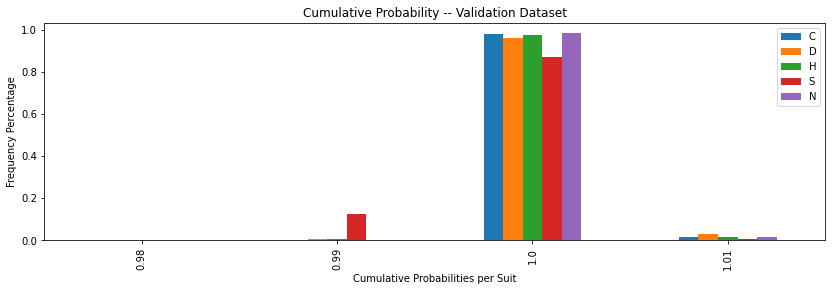

In [13]:
# plot cumulative sum of predicted probabilities per suit. Ideally should be 1.0.
plotd = {}
#for d in mlBridgeLib.NESW:
for s in mlBridgeLib.CDHSN:
    plotd[s] =df_preds.filter(regex=f'^P_.{s}\d+(_pred)$').sum(axis='columns').div(len(mlBridgeLib.NESW)).astype('float').round(2).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(14,4), xlabel='Cumulative Probabilities per Suit', ylabel='Frequency Percentage', title='Cumulative Probability -- Validation Dataset')

In [14]:
df_preds.filter(regex='^P_NN\d+(|_pred)$')

,P_NN0,P_NN0_pred,P_NN1,P_NN10,P_NN10_pred,P_NN11,P_NN11_pred,P_NN12,P_NN12_pred,P_NN13,P_NN13_pred,P_NN1_pred,P_NN2,P_NN2_pred,P_NN3,P_NN3_pred,P_NN4,P_NN4_pred,P_NN5,P_NN5_pred,P_NN6,P_NN6_pred,P_NN7,P_NN7_pred,P_NN8,P_NN8_pred,P_NN9,P_NN9_pred
20470,0.00,0.00,0.00,0.00,0.13,1.00,-0.01,0.00,-0.01,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.21,0.00,0.65
20471,0.00,-0.00,0.00,0.00,-0.00,0.00,0.03,0.00,0.91,0.00,0.10,-0.01,0.00,0.00,0.00,-0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,-0.01,1.00,-0.01,0.00,-0.02
20472,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,-0.00,0.00,0.27,1.00,0.61,0.00,0.05,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01
20473,0.00,-0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.50,0.00,0.50,0.01,0.00,0.02,0.00,0.02,0.00,0.23,0.00,0.63,0.00,0.10,0.00,0.01
20474,0.00,-0.00,0.00,0.00,0.01,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.01,0.00,0.03,0.00,0.35,0.00,0.59,1.00,0.03,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
20475,0.00,0.01,0.00,0.00,0.12,0.00,-0.01,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.08,0.00,0.20,1.00,0.18,0.00,0.41
20476,0.00,0.00,0.00,0.00,-0.01,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,1.00,0.08,0.00,0.75,0.00,0.15,0.00,0.01,0.00,0.03,0.00,-0.01
20477,0.00,-0.01,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,-0.00,0.00,-0.01,0.00,0.01,0.00,0.18,0.00,0.75,0.50,0.07,0.50,-0.00,0.00,0.01
20478,0.00,-0.00,0.00,0.00,0.17,0.00,0.01,0.00,0.02,0.00,-0.01,-0.00,0.00,-0.01,0.00,-0.01,0.00,-0.02,0.00,-0.01,0.00,-0.01,1.00,0.00,0.00,0.37,0.00,0.49
20479,0.00,-0.00,0.00,0.00,0.19,0.00,0.02,0.00,0.01,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.01,0.00,-0.01,0.00,0.09,0.00,0.16,0.00,0.20,0.00,0.33


<AxesSubplot:title={'center':'Frequency of Variance by Trick -- Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

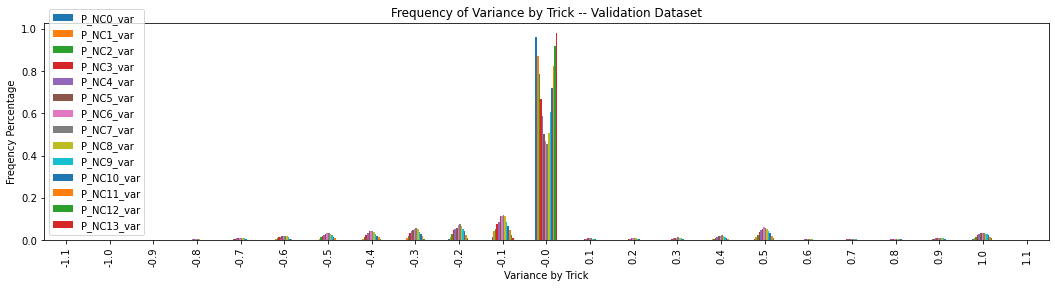

In [15]:
# plot variance .1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('P_NC')]:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n+'_var'].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Frequency of Variance by Trick -- Validation Dataset')

In [16]:
# takes 1m15s
# calculate expected value of every possible contract
scoresd, setScoresd, makeScoresd = mlBridgeLib.ScoreDicts()
expected_d = defaultdict(list)
def CalculateExpected(r):
    for nd,d in enumerate(mlBridgeLib.NESW):
        for ns,s in enumerate(mlBridgeLib.CDHSN):
            # scale raw predictions probabiliites to a scale of (0,1]
            pred_probs = [r['P_'+d+s+str(t)+'_pred'] for t in range(0,13)]
            minValue = min(pred_probs)
            zeroedValues = [p-minValue for p in pred_probs]
            rangeOfValues = sum(zeroedValues)
            scaleFactor = 1/rangeOfValues
            scaled_probs = [p*scaleFactor for p in zeroedValues]
            for level in range(0,7):
                double = 0 # todo: if < 0
                vul = 0 # todo: r['Vul_NS']
                declarer = 0 # todo: needed for correct vul?
                scores = scoresd[(level, ns, vul, double, declarer)] # (bid-level, strain(0-4), vul(0-3), double/re-double, declarer-direction)
                e = sum([scaled_probs[t]*scores[t] for t in range(0,13)])
                expected_d['E_'+d+s+str(level+1)].append(e)
                #ee = 0
                #for t in range(0,13):
                #    ee += scaled_probs[t]*scores[t]
                #    print(t,scores,scaled_probs[t],scores[t],round(ee,2))
                #error
df_preds.apply(CalculateExpected,axis='columns')
expected_df = pd.DataFrame(expected_d,index=df_preds.index)
expected_df

,E_NC1,E_NC2,E_NC3,E_NC4,E_NC5,E_NC6,E_NC7,E_ND1,E_ND2,E_ND3,E_ND4,E_ND5,E_ND6,E_ND7,E_NH1,E_NH2,E_NH3,E_NH4,E_NH5,E_NH6,E_NH7,E_NS1,E_NS2,E_NS3,E_NS4,E_NS5,E_NS6,E_NS7,E_NN1,E_NN2,E_NN3,E_NN4,E_NN5,E_NN6,E_NN7,E_EC1,E_EC2,E_EC3,E_EC4,E_EC5,E_EC6,E_EC7,E_ED1,E_ED2,E_ED3,E_ED4,E_ED5,E_ED6,E_ED7,E_EH1,E_EH2,E_EH3,E_EH4,E_EH5,E_EH6,E_EH7,E_ES1,E_ES2,E_ES3,E_ES4,...,E_SD4,E_SD5,E_SD6,E_SD7,E_SH1,E_SH2,E_SH3,E_SH4,E_SH5,E_SH6,E_SH7,E_SS1,E_SS2,E_SS3,E_SS4,E_SS5,E_SS6,E_SS7,E_SN1,E_SN2,E_SN3,E_SN4,E_SN5,E_SN6,E_SN7,E_WC1,E_WC2,E_WC3,E_WC4,E_WC5,E_WC6,E_WC7,E_WD1,E_WD2,E_WD3,E_WD4,E_WD5,E_WD6,E_WD7,E_WH1,E_WH2,E_WH3,E_WH4,E_WH5,E_WH6,E_WH7,E_WS1,E_WS2,E_WS3,E_WS4,E_WS5,E_WS6,E_WS7,E_WN1,E_WN2,E_WN3,E_WN4,E_WN5,E_WN6,E_WN7
20470,-41.92,-101.98,-152.84,-201.82,-248.53,-298.63,-353.88,74.42,67.07,6.31,-87.38,-132.01,-180.71,-244.65,132.76,128.90,99.16,87.49,-92.23,-149.86,-202.59,145.38,143.15,139.80,174.17,-81.09,-132.15,-183.97,120.83,113.52,251.63,-25.50,-128.00,-178.08,-228.08,18.79,-58.52,-115.12,-166.10,-209.34,-259.21,-318.35,-142.75,-191.70,-240.10,-289.83,-334.40,-383.48,-442.04,-178.36,-228.25,-278.09,-326.90,-378.19,-427.27,-478.90,-177.77,-227.47,-276.36,-319.60,...,-85.56,-131.92,-180.93,-242.24,133.33,129.17,99.97,87.05,-95.10,-149.42,-202.33,141.27,138.58,133.61,164.04,-83.77,-134.15,-187.87,117.05,108.51,226.34,-40.76,-133.04,-182.71,-233.31,15.49,-59.58,-115.18,-165.56,-207.58,-256.92,-319.13,-141.92,-190.74,-239.28,-288.97,-335.55,-384.57,-441.18,-175.00,-224.78,-274.39,-320.94,-374.45,-423.83,-475.78,-176.64,-225.90,-275.06,-318.40,-372.70,-419.76,-478.32,-161.95,-212.53,-257.30,-306.42,-356.73,-403.21,-463.45
20471,152.07,146.66,140.60,135.53,347.58,725.48,-81.60,2.49,-43.30,-97.68,-147.37,-198.80,-232.68,-312.39,164.14,157.60,150.97,357.13,286.55,59.75,-138.83,157.04,152.26,146.77,363.32,259.72,-68.00,-147.73,172.78,163.35,358.74,349.94,332.76,684.95,-122.91,-271.01,-319.29,-367.15,-416.21,-458.90,-498.28,-569.43,-49.54,-103.53,-159.55,-205.66,-240.87,-283.74,-363.08,-226.21,-273.86,-322.79,-360.43,-417.12,-449.01,-531.28,-203.18,-250.31,-299.70,-338.10,...,-148.34,-200.25,-238.55,-312.75,162.63,156.76,149.88,353.13,283.56,56.43,-140.02,156.85,152.48,146.78,362.47,259.93,-73.42,-147.79,201.82,197.28,420.66,413.75,400.36,788.29,-91.21,-264.74,-312.93,-360.39,-409.35,-450.16,-491.26,-563.22,-48.26,-104.51,-159.83,-206.29,-245.00,-288.15,-363.24,-227.56,-275.25,-323.96,-361.16,-417.96,-449.53,-532.36,-200.02,-246.89,-296.28,-333.57,-389.40,-434.70,-503.23,-263.78,-312.50,-349.19,-400.83,-454.66,-501.00,-566.67
20472,-178.34,-227.77,-277.54,-327.84,-374.99,-424.20,-478.65,-12.97,-80.22,-130.97,-178.46,-222.35,-270.18,-333.66,78.78,-4.10,-84.92,-126.30,-181.44,-229.11,-288.29,-148.28,-197.08,-246.02,-289.71,-343.50,-392.63,-448.48,-152.20,-201.67,-245.65,-298.80,-351.02,-400.27,-453.97,92.64,86.72,73.58,-40.97,-109.67,-153.44,-213.86,-36.49,-98.06,-148.06,-198.82,-249.40,-300.49,-350.49,-78.53,-127.43,-173.77,-210.32,-265.18,-314.62,-381.84,110.74,98.51,9.84,-57.82,...,-179.89,-225.46,-271.80,-334.08,77.11,-7.66,-86.05,-127.73,-182.43,-229.25,-289.87,-147.55,-196.06,-244.70,-287.93,-340.68,-390.48,-447.79,-154.20,-204.23,-248.09,-300.56,-352.97,-403.63,-455.86,104.62,99.91,91.06,-23.79,-98.38,-144.17,-201.21,-32.66,-94.75,-144.15,-194.61,-246.77,-295.53,-347.61,-78.49,-127.49,-174.50,-211.47,-266.23,-315.54,-380.91,107.12,95.34,16.87,-53.50,-125.09,-185.78,-239.97,34.28,-38.79,-60.99,-131.09,-201.52,-251.28,-309.99
20473,-122.61,-163.07,-216.12,-269.44,-309.91,-354.23,-425.57,82.41,54.81,-6.02,-72.27,-136.61,-178.45,-243.29,48.99,-49.50,-107.43,-146.74,-199.94,-248.11,-310.94,-168.62,-217.30,-266.81,-310.01,-364.14,-412.50,-470.30,44.58,-50.89,-102.17,-158.16,-210.40,-257.54,-314.98,41.64,27.33,11.01,-56.24,-135.15,-180.72,-253.23,-133.92,-183.12,-232.09,-282.18,-332.20,-379.46,-434.04,-57.36,-108.40,-159.45,-209.23,-259.25,-311.00,-361.00,130.74,126.24,117.55,49.17,...,-73.36,-137.53,-177.74,-244.43,53.29,-48.10,-107.05

In [17]:
# takes 2s
# Create columns for max expected contracts for (direction, suit), all suits, for all directions.
# todo: generate NaN for suits having no positive expectation? What about sacrifices?
print(expected_df.columns)
#expected_df.drop('E__',inplace=True,axis='columns')
for nd,d in enumerate(mlBridgeLib.NESW):
    for ns,s in enumerate(mlBridgeLib.CDHSN):
        expected_df['E_'+d+s] = expected_df.filter(regex=f'^E_{d}{s}\d$').idxmax(axis='columns').str[-1:] # max level
    expected_df['E_'+d] = expected_df.filter(regex=f'^E_{d}.\d$').idxmax(axis='columns').str[-2:].str[::-1] # max contract per direction
expected_df['E_'] = expected_df.filter(regex=f'^E_..\d$').idxmax(axis='columns').str[-3:].str[::-1] # max contract for all directions
# Nicer to view if sorted by column length and then NESW. do this by creating a tuple of (len,NESW.index). Tricky and wasn't worth the effort.
expected_df.filter(regex='^E_.?.?$').sort_index(axis='columns',key=lambda k: [(len(kk),-1 if len(kk) < 3 else mlBridgeLib.NESW.index(kk[2])) for kk in k])

Index(['E_NC1', 'E_NC2', 'E_NC3', 'E_NC4', 'E_NC5', 'E_NC6', 'E_NC7', 'E_ND1',
       'E_ND2', 'E_ND3',
       ...
       'E_WS5', 'E_WS6', 'E_WS7', 'E_WN1', 'E_WN2', 'E_WN3', 'E_WN4', 'E_WN5',
       'E_WN6', 'E_WN7'],
      dtype='object', length=140)


,E_,E_N,E_E,E_S,E_W,E_NC,E_ND,E_NH,E_NS,E_NN,E_EC,E_ED,E_EH,E_ES,E_EN,E_SC,E_SD,E_SH,E_SS,E_SN,E_WC,E_WD,E_WH,E_WS,E_WN
20470,3NN,3N,1C,3N,1C,1,1,1,4,3,1,1,1,1,1,1,1,1,4,3,1,1,1,1,1
20471,6NS,6C,1D,6N,1D,6,1,4,4,6,1,1,1,1,1,6,1,4,4,6,1,1,1,1,1
20472,1SE,1H,1S,1H,1S,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20473,1SW,1D,1S,1D,1S,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20474,3NW,1H,3N,1H,3N,1,1,1,1,1,1,1,1,4,3,1,1,1,1,1,1,1,1,4,3
20475,4HN,4H,1S,4H,1S,1,1,4,1,3,1,1,1,1,1,1,1,4,1,3,1,1,1,1,1
20476,1HE,1C,1H,1C,1H,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20477,1HE,1S,1H,1S,1H,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20478,4SN,4S,1H,4S,1H,1,1,1,4,3,1,1,1,1,1,1,1,1,4,3,1,1,1,1,1
20479,3NN,3N,1D,3N,1D,1,1,1,1,3,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1


In [18]:
mlBridgeLib.allHigherContracts_d

{(0, 'Pass'): [(1, 'C'),
  (1, 'D'),
  (1, 'H'),
  (1, 'S'),
  (1, 'N'),
  (2, 'C'),
  (2, 'D'),
  (2, 'H'),
  (2, 'S'),
  (2, 'N'),
  (3, 'C'),
  (3, 'D'),
  (3, 'H'),
  (3, 'S'),
  (3, 'N'),
  (4, 'C'),
  (4, 'D'),
  (4, 'H'),
  (4, 'S'),
  (4, 'N'),
  (5, 'C'),
  (5, 'D'),
  (5, 'H'),
  (5, 'S'),
  (5, 'N'),
  (6, 'C'),
  (6, 'D'),
  (6, 'H'),
  (6, 'S'),
  (6, 'N'),
  (7, 'C'),
  (7, 'D'),
  (7, 'H'),
  (7, 'S'),
  (7, 'N')],
 (1, 'C'): [(1, 'D'),
  (1, 'H'),
  (1, 'S'),
  (1, 'N'),
  (2, 'C'),
  (2, 'D'),
  (2, 'H'),
  (2, 'S'),
  (2, 'N'),
  (3, 'C'),
  (3, 'D'),
  (3, 'H'),
  (3, 'S'),
  (3, 'N'),
  (4, 'C'),
  (4, 'D'),
  (4, 'H'),
  (4, 'S'),
  (4, 'N'),
  (5, 'C'),
  (5, 'D'),
  (5, 'H'),
  (5, 'S'),
  (5, 'N'),
  (6, 'C'),
  (6, 'D'),
  (6, 'H'),
  (6, 'S'),
  (6, 'N'),
  (7, 'C'),
  (7, 'D'),
  (7, 'H'),
  (7, 'S'),
  (7, 'N')],
 (1, 'D'): [(1, 'H'),
  (1, 'S'),
  (1, 'N'),
  (2, 'C'),
  (2, 'D'),
  (2, 'H'),
  (2, 'S'),
  (2, 'N'),
  (3, 'C'),
  (3, 'D'),
  (3, 'H'),
  (3,

In [19]:
# takes 5m
# Create columns for max expected contracts for (direction, suit), all suits, for all directions.
# todo: why does this take so long? Will moving code into NextBestContract() help?
# todo: generate NaN for suits having no positive expectation? What about sacrifices?

# determine the direction's next best contract
def NextBestContract(r):
    if len(r):
        i = r.max()
        if i > 0:
            return r.idxmax()
    return 'Pass'

print(expected_df.columns)
#expected_df.drop('NB__',inplace=True,axis='columns')
for nd,d in enumerate(mlBridgeLib.NESW):
    for ns,s in enumerate(mlBridgeLib.CDHSN):
        expected_df[f'NB_{d}0'] = expected_df[(f'E_{d}{ss}{ll}' for ll,ss in mlBridgeLib.allHigherContracts_d[(0,'Pass')])].apply(NextBestContract,axis='columns').astype('string')
        for l in range(1,8):
            expected_df[f'NB_{d}{s}{l}'] = expected_df[(f'E_{d}{ss}{ll}' for ll,ss in mlBridgeLib.allHigherContracts_d[(l,s)])].apply(NextBestContract,axis='columns').astype('string')
# Nicer to view if sorted by column length and then NESW. do this by creating a tuple of (len,NESW.index). Tricky and wasn't worth the effort.
expected_df.filter(regex='^NB_')

Index(['E_NC1', 'E_NC2', 'E_NC3', 'E_NC4', 'E_NC5', 'E_NC6', 'E_NC7', 'E_ND1',
       'E_ND2', 'E_ND3',
       ...
       'E_SS', 'E_SN', 'E_S', 'E_WC', 'E_WD', 'E_WH', 'E_WS', 'E_WN', 'E_W',
       'E_'],
      dtype='object', length=165)


C:\Users\bsali\AppData\Local\Temp/ipykernel_3548/3545561391.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  expected_df[f'NB_{d}{s}{l}'] = expected_df[(f'E_{d}{ss}{ll}' for ll,ss in mlBridgeLib.allHigherContracts_d[(l,s)])].apply(NextBestContract,axis='columns').astype('string')
C:\Users\bsali\AppData\Local\Temp/ipykernel_3548/3545561391.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  expected_df[f'NB_{d}0'] = expected_df[(f'E_{d}{ss}{ll}' for ll,ss in mlBridgeLib.allHigherContracts_d[(0,'Pass')])].apply(NextBestCont

,NB_N0,NB_NC1,NB_NC2,NB_NC3,NB_NC4,NB_NC5,NB_NC6,NB_NC7,NB_ND1,NB_ND2,NB_ND3,NB_ND4,NB_ND5,NB_ND6,NB_ND7,NB_NH1,NB_NH2,NB_NH3,NB_NH4,NB_NH5,NB_NH6,NB_NH7,NB_NS1,NB_NS2,NB_NS3,NB_NS4,NB_NS5,NB_NS6,NB_NS7,NB_NN1,NB_NN2,NB_NN3,NB_NN4,NB_NN5,NB_NN6,NB_NN7,NB_E0,NB_EC1,NB_EC2,NB_EC3,NB_EC4,NB_EC5,NB_EC6,NB_EC7,NB_ED1,NB_ED2,NB_ED3,NB_ED4,NB_ED5,NB_ED6,NB_ED7,NB_EH1,NB_EH2,NB_EH3,NB_EH4,NB_EH5,NB_EH6,NB_EH7,NB_ES1,NB_ES2,...,NB_SD5,NB_SD6,NB_SD7,NB_SH1,NB_SH2,NB_SH3,NB_SH4,NB_SH5,NB_SH6,NB_SH7,NB_SS1,NB_SS2,NB_SS3,NB_SS4,NB_SS5,NB_SS6,NB_SS7,NB_SN1,NB_SN2,NB_SN3,NB_SN4,NB_SN5,NB_SN6,NB_SN7,NB_W0,NB_WC1,NB_WC2,NB_WC3,NB_WC4,NB_WC5,NB_WC6,NB_WC7,NB_WD1,NB_WD2,NB_WD3,NB_WD4,NB_WD5,NB_WD6,NB_WD7,NB_WH1,NB_WH2,NB_WH3,NB_WH4,NB_WH5,NB_WH6,NB_WH7,NB_WS1,NB_WS2,NB_WS3,NB_WS4,NB_WS5,NB_WS6,NB_WS7,NB_WN1,NB_WN2,NB_WN3,NB_WN4,NB_WN5,NB_WN6,NB_WN7
20470,E_NN3,E_NN3,E_NN3,E_NN3,E_NS4,Pass,Pass,Pass,E_NN3,E_NN3,E_NN3,E_NS4,Pass,Pass,Pass,E_NN3,E_NN3,E_NN3,E_NS4,Pass,Pass,Pass,E_NN3,E_NN3,E_NN3,Pass,Pass,Pass,Pass,E_NN3,E_NN3,E_NS4,Pass,Pass,Pass,Pass,E_EC1,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,...,Pass,Pass,Pass,E_SN3,E_SN3,E_SN3,E_SS4,Pass,Pass,Pass,E_SN3,E_SN3,E_SN3,Pass,Pass,Pass,Pass,E_SN3,E_SN3,E_SS4,Pass,Pass,Pass,Pass,E_WC1,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
20471,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NN6,Pass,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NN6,Pass,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NN6,Pass,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NN6,Pass,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,...,E_SN6,E_SN6,Pass,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,Pass,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,Pass,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
20472,E_NH1,E_NH1,Pass,Pass,Pass,Pass,Pass,Pass,E_NH1,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,E_ES1,E_ES1,E_ES2,E_ES3,Pass,Pass,Pass,Pass,E_ES1,E_ES2,E_ES3,Pass,Pass,Pass,Pass,E_ES1,E_ES2,E_ES3,Pass,Pass,Pass,Pass,E_ES2,E_EC3,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,E_WS1,E_WS1,E_WS2,E_WS3,Pass,Pass,Pass,Pass,E_WS1,E_WS2,E_WS3,Pass,Pass,Pass,Pass,E_WS1,E_WS2,E_WS3,Pass,Pass,Pass,Pass,E_WC2,E_WC3,Pass,Pass,Pass,Pass,Pass,E_WC2,E_WC3,Pass,Pass,Pass,Pass,Pass
20473,E_ND1,E_ND1,E_ND2,Pass,Pass,Pass,Pass,Pass,E_ND2,Pass,Pass,Pass,Pass,Pass,Pass,E_ND2,Pass,Pass,Pass,Pass,Pass,Pass,E_ND2,Pass,Pass,Pass,Pass,Pass,Pass,E_ND2,Pass,Pass,Pass,Pass,Pass,Pass,E_ES1,E_ES1,E_ES2,E_ES3,E_ES4,Pass,Pass,Pass,E_ES1,E_ES2,E_ES3,E_ES4,Pass,Pass,Pass,E_ES1,E_ES2,E_ES3,E_ES4,Pass,Pass,Pass,E_ES2,E_ES3,...,Pass,Pass,Pass,E_SD2,Pass,Pass,Pass,Pass,Pass,Pass,E_SD2,Pass,Pass,Pass,Pass,Pass,Pass,E_SD2,Pass,Pass,Pass,Pass,Pass,Pass,E_WS1,E_WS1,E_WS2,E_WS3,E_WS4,Pass,Pass,Pass,E_WS1,E_WS2,E_WS3,E_WS4,Pass,Pass,Pass,E_WS1,E_WS2,E_WS3,E_WS4,Pass,Pass,Pass,E_WS2,E_WS3,E_WS4,Pass,Pass,Pass,Pass,E_WS2,E_WS3,E_WS4,Pass,Pass,Pass,Pass
20474,E_NH1,E_NH1,E_ND2,E_ND3,Pass,Pass,Pass,Pass,E_NH1,E_NH2,Pass,Pass,Pass,Pass,Pass,E_ND2,E_ND3,Pass,Pass,Pass,Pass,Pass,E_ND2,E_ND3,Pass,Pass,Pass,Pass,Pass,E_ND2,E_ND3,Pass,Pass,Pass,Pass,Pass,E_EN3,E_EN3,E_EN3,E_EN3,E_ES4,Pass,Pass,Pass,E_EN3,E_EN3,E_EN3,E_ES4,Pass,Pass,Pass,E_EN3,E_EN3,E_EN3,E_ES4,Pass,Pass,Pass,E_EN3,E_EN3,...,Pass,Pass,Pass,E_SD2,E_SD3,Pass,Pass,Pass,Pass,Pass,E_SD2,E_SD3,Pass,Pass,Pass,Pass,Pass,E_SD2,E_SD3,Pass,Pass,Pass,Pass,Pass,E_WN3,E_WN3,E_WN3,E_WN3,E_WS4,Pass,Pass,Pass,E_WN3,E_WN3,E_WN3,E_WS4,Pass,Pass,Pass,E_WN3,E_WN3,E_WN3,

In [20]:
# display next-bid columns ordered by bidding (CDHSN,1-7)
# todo: use like='NB_' instead?
expected_df.filter(regex='^NB_').sort_index(key=lambda k:[(mlBridgeLib.NESW.index(kk[3]),(-1 if kk[-1]=='0' else kk[-1]),(-1 if kk[-1]=='0' else mlBridgeLib.CDHSN.index(kk[-2]))) for kk in k],axis='columns')
# replace('Pass','').style.apply(mlBridgeLib.highlight_last_max,axis='columns')

,NB_N0,NB_NC1,NB_ND1,NB_NH1,NB_NS1,NB_NN1,NB_NC2,NB_ND2,NB_NH2,NB_NS2,NB_NN2,NB_NC3,NB_ND3,NB_NH3,NB_NS3,NB_NN3,NB_NC4,NB_ND4,NB_NH4,NB_NS4,NB_NN4,NB_NC5,NB_ND5,NB_NH5,NB_NS5,NB_NN5,NB_NC6,NB_ND6,NB_NH6,NB_NS6,NB_NN6,NB_NC7,NB_ND7,NB_NH7,NB_NS7,NB_NN7,NB_E0,NB_EC1,NB_ED1,NB_EH1,NB_ES1,NB_EN1,NB_EC2,NB_ED2,NB_EH2,NB_ES2,NB_EN2,NB_EC3,NB_ED3,NB_EH3,NB_ES3,NB_EN3,NB_EC4,NB_ED4,NB_EH4,NB_ES4,NB_EN4,NB_EC5,NB_ED5,NB_EH5,...,NB_SD3,NB_SH3,NB_SS3,NB_SN3,NB_SC4,NB_SD4,NB_SH4,NB_SS4,NB_SN4,NB_SC5,NB_SD5,NB_SH5,NB_SS5,NB_SN5,NB_SC6,NB_SD6,NB_SH6,NB_SS6,NB_SN6,NB_SC7,NB_SD7,NB_SH7,NB_SS7,NB_SN7,NB_W0,NB_WC1,NB_WD1,NB_WH1,NB_WS1,NB_WN1,NB_WC2,NB_WD2,NB_WH2,NB_WS2,NB_WN2,NB_WC3,NB_WD3,NB_WH3,NB_WS3,NB_WN3,NB_WC4,NB_WD4,NB_WH4,NB_WS4,NB_WN4,NB_WC5,NB_WD5,NB_WH5,NB_WS5,NB_WN5,NB_WC6,NB_WD6,NB_WH6,NB_WS6,NB_WN6,NB_WC7,NB_WD7,NB_WH7,NB_WS7,NB_WN7
20470,E_NN3,E_NN3,E_NN3,E_NN3,E_NN3,E_NN3,E_NN3,E_NN3,E_NN3,E_NN3,E_NN3,E_NN3,E_NN3,E_NN3,E_NN3,E_NS4,E_NS4,E_NS4,E_NS4,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,E_EC1,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,...,E_SN3,E_SN3,E_SN3,E_SS4,E_SS4,E_SS4,E_SS4,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,E_WC1,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
20471,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NC6,E_NN6,E_NN6,E_NN6,E_NN6,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,...,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,E_SN6,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
20472,E_NH1,E_NH1,E_NH1,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,E_ES1,E_ES1,E_ES1,E_ES1,E_ES2,E_ES2,E_ES2,E_ES2,E_ES2,E_EC3,E_EC3,E_ES3,E_ES3,E_ES3,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,E_WS1,E_WS1,E_WS1,E_WS1,E_WC2,E_WC2,E_WS2,E_WS2,E_WS2,E_WC3,E_WC3,E_WS3,E_WS3,E_WS3,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
20473,E_ND1,E_ND1,E_ND2,E_ND2,E_ND2,E_ND2,E_ND2,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,E_ES1,E_ES1,E_ES1,E_ES1,E_ES2,E_ES2,E_ES2,E_ES2,E_ES2,E_ES3,E_ES3,E_ES3,E_ES3,E_ES3,E_ES4,E_ES4,E_ES4,E_ES4,E_ES4,Pass,Pass,Pass,Pass,Pass,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,E_WS1,E_WS1,E_WS1,E_WS1,E_WS2,E_WS2,E_WS2,E_WS2,E_WS2,E_WS3,E_WS3,E_WS3,E_WS3,E_WS3,E_WS4,E_WS4,E_WS4,E_WS4,E_WS4,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
20474,E_NH1,E_NH1,E_NH1,E_ND2,E_ND2,E_ND2,E_ND2,E_NH2,E_ND3,E_ND3,E_ND3,E_ND3,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,E_EN3,E_EN3,E_EN3,E_EN3,E_EN3,E_EN3,E_EN3,E_EN3,E_EN3,E_EN3,E_EN3,E_EN3,E_EN3,E_EN3,E_EN3,E_ES4,E_ES4,E_ES4,E_ES4,Pass,Pass,Pass,Pass,Pass,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,E_WN3,E_WN3,E_WN3,E_WN3,E_WN3,E_WN3,E_WN3,E_WN3,E_WN3,E_WN3,E_WN3,E_WN3,E_WN3,E_WN3,E_WN3,E_WS4,E_WS4,E_W

<AxesSubplot:title={'center':'Frequency of Next Best Bids -- Validation Dataset'}, xlabel='Next Best Bid', ylabel='Freqency Percentage'>

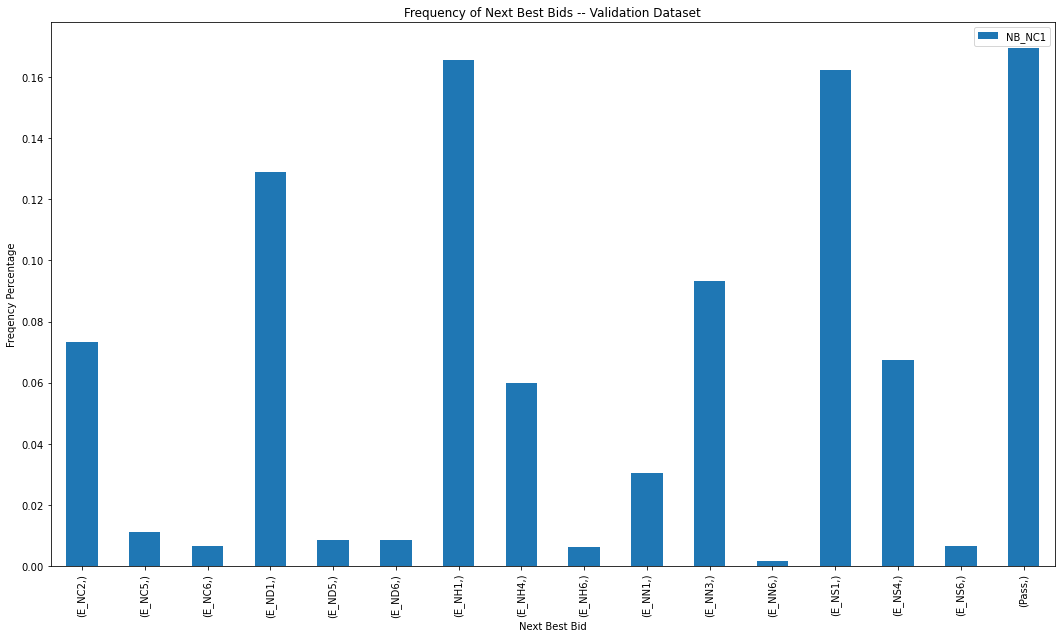

In [21]:
# plot frequency of next best bids
plotd = {}
s = 'C'
l = 1
d = 'N'
for ll,ss in mlBridgeLib.allContracts[1:]:
    plotd[f'NB_{d}{s}{l}'] = expected_df.filter(regex=f'NB_{d}{s}{l}').value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,10), xlabel='Next Best Bid', ylabel='Freqency Percentage', title='Frequency of Next Best Bids -- Validation Dataset')

In [2]:
# todo: experiment with extract?
# expected_df.columns.str.extract(r'^(NB_.*)_N', expand=False).dropna().drop_duplicates().sort_values()

NameError: name 'expected_df' is not defined

In [22]:
# todo:
# need tuples of scores (score,x,xx)? Or add x and xx columns for each bid. Or (score,tricks-taken)
# Create tuple of ((direction, level,suit), predicted-set-score (score,x,xx), next-bid, next-bid-score (score,x,xx))
# bid max of (predicted-set-score, predicted-set-score-doubled, predicted-our-score-redouble, next-bid-score, next-bid-doubled, next-bid-redoubled)
# advanced: predict probabilitity of opponents doubling, redoubling. Create new NB_ table which uses probability of double, redouble.
# advanced: calculate benefits (expected values) of premptive bids from either side by simulating bidding.

In [23]:
# todo:
# provide next bidder with predictions of hcp, suit-lengths, qt, etc for other players. Everything needed to make a bid,x,xx,pass.
# predict DD based on updated predictions.
# choose max expected bid from pass,x,xx,next-bid
# build 2nd bidder's expected_df

In [24]:
def Auction(r):
    bids = []
    bids_d = {}
    passes = -1
    direction = 'N'
    last_bid = f'E_{direction}0'
    while passes != 3:
        #print('last_bid:',last_bid)
        bid_key = f'NB_'+direction+last_bid[3:]
        #print('bid_key:',bid_key)
        bid = r[bid_key]
        #print('bid:',bid)
        # if last bid was partner's (passes==1), bid only if better (greater exp value) than partner's.
        if passes == 1 and bid != 'Pass':
            #print('Partner was last bidder:',last_bid[2],bid[2])
            if r[last_bid] >= r[bid]:
                #print('Partners bid better than my best so passing.')
                bid = 'Pass'
        #print('bids:',bids)
        if bid == 'Pass':
            passes += 1
        else:
            passes = 0
            last_bid = bid
            bid = bid[-3:][::-1] # E_NS4 => 4SN
        bids.append(bid)
        #print('passes:',passes,'last_bid:',last_bid)
        direction = mlBridgeLib.NESW[(mlBridgeLib.NESW.index(direction)+1)%len(mlBridgeLib.NESW)]
        #print('direction:',direction)
    return bids

,Auction,Contract
20470,"[3NN, Pass, Pass, Pass]",3NN
20471,"[6CN, Pass, 6NS, Pass, Pass, Pass]",6NS
20472,"[1HN, 1SE, Pass, Pass, Pass]",1SE
20473,"[1DN, 1SE, 2DS, 2SW, Pass, Pass, Pass]",2SW
20474,"[1HN, 3NE, Pass, Pass, Pass]",3NE
20475,"[4HN, Pass, Pass, Pass]",4HN
20476,"[1CN, 1HE, 2CS, 2HW, Pass, Pass, Pass]",2HW
20477,"[Pass, 1HE, Pass, Pass, Pass]",1HE
20478,"[4SN, Pass, Pass, Pass]",4SN
20479,"[3NN, Pass, Pass, Pass]",3NN


In [ ]:
# takes 2s
bids_df = expected_df.apply(Auction,axis='columns').to_frame(name='Auction') # note use of to_frame(name=)
bids_df['Contract'] = bids_df['Auction'].map(lambda l: l[-4]).astype('string')
bids_df

In [25]:
bids_df['Contract'].value_counts().sort_index()

1CE     101
1CN      91
1DE     143
1DN     156
1DS       3
1DW       2
1HE     630
1HN     626
1HS       8
1HW       9
1NE     534
1NN     553
1NS     179
1NW      68
1SE    1056
1SN    1011
1SS      38
1SW      22
2CE     335
2CN      25
2CS     314
2CW      47
2DE     334
2DN      26
2DS     451
       ... 
5NE       1
5SE      15
5SN       2
5SS      56
5SW      58
6CE     276
6CN     257
6CS      21
6CW      45
6DE     290
6DN     352
6DS      22
6DW      31
6HE     296
6HN     256
6HS      19
6HW      20
6NE     102
6NN      65
6NS      17
6NW      28
6SE     221
6SN     270
6SS      20
6SW      20
Name: Contract, Length: 115, dtype: Int64

<AxesSubplot:title={'center':'Frequency of Contracts -- Validation Dataset'}, xlabel='Contracts', ylabel='Frequency Percentage'>

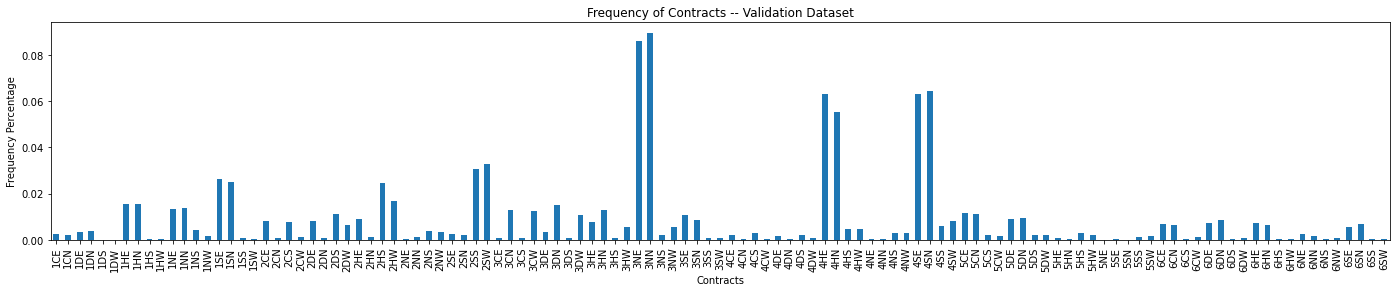

In [26]:
# plot frequency of contracts
bids_df['Contract'].value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(24,4), xlabel='Contracts', ylabel='Frequency Percentage', title='Frequency of Contracts -- Validation Dataset')

In [27]:
bids_df['Contract'].eq('1SN').sum()
#.drop(['Mean_DD'],inplace=True,axis='columns')

1011

In [33]:
# takes 2s
# need to make predictions of all hands, not just validation set.
unique_contracts = [c for c in bids_df['Contract'].unique() if c !='Pass']
print(unique_contracts)
unique_contracts_d = {}
for c in unique_contracts:
    idx = bids_df[bids_df['Contract'].eq(c)].index
    a_df = augmented_df.iloc[idx]
    details = [('DD',f'DD_{c[-1]}_{c[-2]}',mlBridgeLib.CDHSN),('HCP',f'HCP_{c[-1]}',mlBridgeLib.CDHSN),('DP',f'DP_{c[-1]}',mlBridgeLib.CDHSN),('SL',f'SL_{c[-1]}_{c[-2]}',mlBridgeLib.CDHS)]
    for kk,k,allowed in details:
        #print(c[-2],allowed,c[-2] in allowed)
        if c[-2] in allowed:
            s_df = a_df[k]
            unique_contracts_d[(c,kk+'_mean')] = s_df.mean().astype('float')
            unique_contracts_d[(c,kk+'_std')] = s_df.std().astype('float')
#print(unique_contracts_d)
for stat in ['DD_mean','DD_std','HCP_mean','HCP_std','DP_mean','DP_std','SL_mean','SL_std']:
    bids_df[stat] = bids_df['Contract'].map(lambda k: None if k == 'Pass' else unique_contracts_d.get((k,stat),None)).astype('float')
bids_df

['3NN', '6NS', '1SE', '2SW', '3NE', '4HN', '2HW', '1HE', '4SN', '1SN', '1HN', '4HE', '2HE', '4NE', '2CS', '6CE', '2DW', '3HN', '5CN', '1NE', '4SE', '1NN', '5DN', '5CE', '3DN', '4DS', '6DE', '4NS', '6CN', '3HW', '1CN', '6HN', '3HE', '2HS', '2NW', '2DS', '4CS', '2CE', '3SE', '2DE', '3DS', '3NS', '3CN', '2SS', '3CW', '5DE', '2SE', '2SN', '4SW', '3DE', '5HW', '5DS', '1NS', '3CE', '1DN', '6HE', '6NE', '2NS', '1DE', '6SN', '6SS', '5SW', '5HE', '4HS', '1SS', '3DW', '3SW', '5DW', '6SE', '6DN', '4SS', '2NN', '3SN', '5CW', '4NW', '6NW', '5HS', '3HS', '3NW', '4HW', '1CE', '5CS', '4CE', '4DW', '2DN', '6CW', '4DE', '1NW', '3SS', '1SW', '6CS', '2CW', '2CN', '4CW', '6DS', '5SS', '2HN', '6DW', '6SW', '6HW', '3CS', '2NE', '4CN', '6NN', '1HW', '6HS', '5SE', '4NN', '5HN', '1DW', '5NE', '5SN', '4DN', '1HS', '1DS']


,Auction,Contract,DD_mean,DD_std,HCP_mean,HCP_std,DP_mean,DP_std,SL_mean,SL_std
20470,"[3NN, Pass, Pass, Pass]",3NN,7.52,2.59,13.69,3.63,1.30,0.87,NaN,NaN
20471,"[6CN, Pass, 6NS, Pass, Pass, Pass]",6NS,9.00,2.18,8.12,4.77,1.53,0.87,NaN,NaN
20472,"[1HN, 1SE, Pass, Pass, Pass]",1SE,8.18,2.25,10.55,4.26,1.51,0.90,3.83,1.27
20473,"[1DN, 1SE, 2DS, 2SW, Pass, Pass, Pass]",2SW,8.17,2.18,10.23,4.08,1.56,0.94,3.95,1.26
20474,"[1HN, 3NE, Pass, Pass, Pass]",3NE,7.35,2.62,11.16,4.30,1.58,0.94,NaN,NaN
20475,"[4HN, Pass, Pass, Pass]",4HN,8.86,2.19,12.40,3.77,2.00,0.97,4.36,1.34
20476,"[1CN, 1HE, 2CS, 2HW, Pass, Pass, Pass]",2HW,8.29,2.14,10.20,4.11,1.66,0.99,4.08,1.37
20477,"[Pass, 1HE, Pass, Pass, Pass]",1HE,8.16,2.17,10.47,4.19,1.58,0.92,3.98,1.29
20478,"[4SN, Pass, Pass, Pass]",4SN,8.75,2.17,12.15,3.67,2.00,0.97,4.38,1.33
20479,"[3NN, Pass, Pass, Pass]",3NN,7.52,2.59,13.69,3.63,1.30,0.87,NaN,NaN


In [47]:
idx = bids_df[bids_df['Contract'].eq('3NN')].index
augmented_df.iloc[idx][['Hands','DD_N_N','HCP_N']]

,Hands,DD_N_N,HCP_N
20470,"((AJ864, Q3, Q6, AQ95), (Q5, T762, J97, 8643), (K72, J854, AK542, K), (T93, AK9, T83, JT72))",11,15
20479,"((KQ8, AKJ7, T764, J4), (93, 32, AKQJ53, T82), (762, Q86, 92, Q9765), (AJT54, T954, 8, AK3))",4,14
20484,"((J, AT43, AQ2, A7654), (K97, KQJ9, 8653, T2), (8652, 87, KT94, QJ3), (AQT43, 652, J7, K98))",7,15
20487,"((T8, AJ654, AJ64, Q8), (A96, KT9, QT3, KT94), (QJ754, 732, K7, A53), (K32, Q8, 9852, J762))",6,12
20499,"((AK4, KT, QJ8, Q7642), (QJ963, Q97, 3, KJ53), (T75, 54, AKT62, AT8), (82, AJ8632, 9754, 9))",9,15
20503,"((K4, AK8, 9543, JT94), (Q653, J4, AQ87, A53), (T97, 76532, K2, K76), (AJ82, QT9, JT6, Q82))",5,11
20514,"((7, AK9, AQ6, A86542), (T43, J64, 8742, JT7), (AKJ86, Q72, KJ, KQ9), (Q952, T853, T953, 3))",13,17
20516,"((943, AKJ4, AK6, K32), (J8, T9872, 952, J86), (2, Q53, QJT87, AT75), (AKQT765, 6, 43, Q94))",6,18
20518,"((A852, T762, J7, AKQ), (K976, AQ5, KT3, 862), (QJT4, KJ, 98542, J3), (3, 9843, AQ6, T9754))",7,14
20529,"((K6, AKQ9, AJT543, A), (AQJ72, 763, , T9543), (T94, T42, 9876, QJ8), (853, J85, KQ2, K762))",6,21


In [49]:
len(augmented_df),len(bids_df)

(1559556, 40415)

In [56]:
# takes 5s
aug_bids_valid_df = pd.concat([augmented_df.iloc[bids_df.index],bids_df],axis='columns')
aug_bids_valid_df[['Hands','Contract','DD_mean','DD_N_N','HCP_NS','HCP_N','HCP_S']]

,Hands,Contract,DD_mean,DD_N_N,HCP_NS,HCP_N,HCP_S
20470,"((AJ864, Q3, Q6, AQ95), (Q5, T762, J97, 8643), (K72, J854, AK542, K), (T93, AK9, T83, JT72))",3NN,7.52,11.00,29.00,15.00,14.00
20471,"((A, AKQ6, A6, AQJ965), (T96, J94, KJT, KT43), (KJ854, T52, 842, 72), (Q732, 873, Q9753, 8))",6NS,9.00,8.00,28.00,24.00,4.00
20472,"((A52, A82, A953, T86), (KQJ4, KQ9, 64, AKJ2), (976, 76543, K72, Q9), (T83, JT, QJT8, 7543))",1SE,8.18,4.00,17.00,12.00,5.00
20473,"((AJ, QJ872, T72, 642), (KT9542, K965, Q, 75), (86, A, J98643, KJ83), (Q73, T43, AK5, AQT9))",2SW,8.17,2.00,17.00,8.00,9.00
20474,"((5, 532, A863, AT943), (T8743, KQ6, Q95, J5), (Q96, AT987, 72, Q72), (AKJ2, J4, KJT4, K86))",3NE,7.35,4.00,16.00,8.00,8.00
20475,"((KJ, KQ987, JT643, J), (T9853, 4, K8, KQ543), (Q2, AT63, A92, AT62), (A764, J52, Q75, 987))",4HN,8.86,8.00,25.00,11.00,14.00
20476,"((964, 932, AK5, K432), (AKQ5, AJT7, J62, A8), (T32, Q4, Q74, JT965), (J87, K865, T983, Q7))",2HW,8.29,4.00,15.00,10.00,5.00
20477,"((AJ72, J7, KJ7, J953), (K83, AQT432, 96, AK), (QT94, K985, A85, 42), (65, 6, QT432, QT876))",1HE,8.16,8.00,20.00,11.00,9.00
20478,"((42, K753, AJT87, Q2), (A, AJT8, Q95432, 65), (KQJT876, 4, , K9873), (953, Q962, K6, AJT4))",4SN,8.75,6.00,19.00,10.00,9.00
20479,"((KQ8, AKJ7, T764, J4), (93, 32, AKQJ53, T82), (762, Q86, 92, Q9765), (AJT54, T954, 8, AK3))",3NN,7.52,4.00,18.00,14.00,4.00


<AxesSubplot:title={'center':'Frequency of Max Exp Contracts -- Validation Dataset'}, xlabel='Max Exp Contracts', ylabel='Frequency Percentage'>

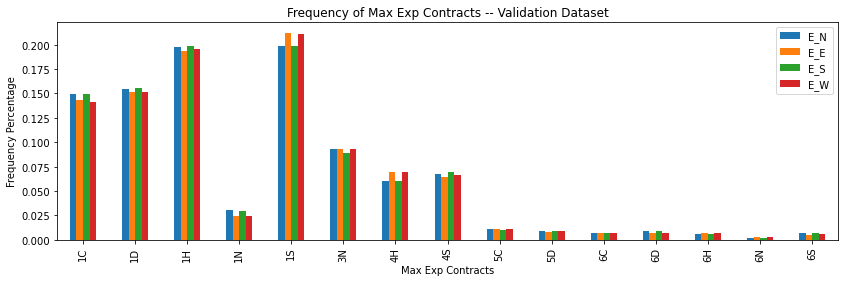

In [29]:
# plot frequency of max exp contracts
plotd = {}
for d in mlBridgeLib.NESW:
    plotd[f'E_{d}'] = expected_df[f'E_{d}'].value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(14,4), xlabel='Max Exp Contracts', ylabel='Frequency Percentage', title='Frequency of Max Exp Contracts -- Validation Dataset')

<AxesSubplot:title={'center':'Frequency of Max Exp Contracts -- Validation Dataset'}, xlabel='Max Exp Contracts', ylabel='Frequency Percentage'>

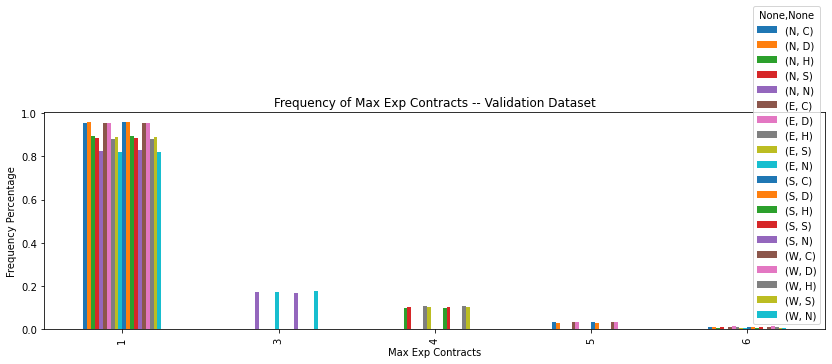

In [30]:
# plot frequency of max exp contracts
plotd = {}
for d in mlBridgeLib.NESW:
    for s in mlBridgeLib.CDHSN:
        plotd[(d,s)] = expected_df[f'E_{d}{s}'].value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(14,4), xlabel='Max Exp Contracts', ylabel='Frequency Percentage', title='Frequency of Max Exp Contracts -- Validation Dataset')

<AxesSubplot:title={'center':'Frequency of Actual DD -- Validation Dataset'}, xlabel='Actual DD', ylabel='Frequency Percentage'>

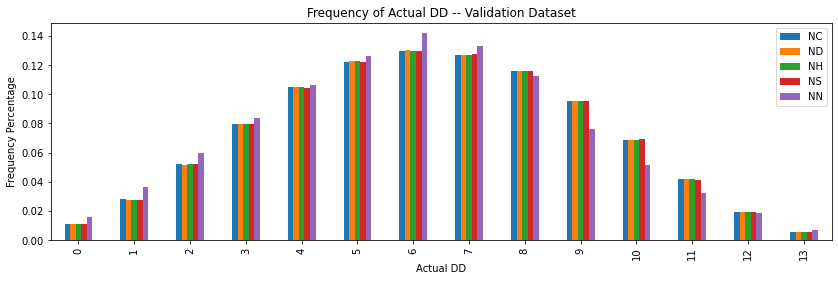

In [31]:
# need plot comparing actual DD vs expected. Bid 1 level if no game.
plotd = {}
for nd,d in enumerate(mlBridgeLib.NESW):
    for ns,s in enumerate(mlBridgeLib.CDHSN):
        plotd[d+s] = augmented_df[f'DD_{d}_{s}'].value_counts(normalize=True).sort_index()
    break
pd.DataFrame(plotd).plot(kind='bar',figsize=(14,4), xlabel='Actual DD', ylabel='Frequency Percentage', title='Frequency of Actual DD -- Validation Dataset')

In [32]:
s = 'C'
l = 1
nb_df = expected_df.filter(regex=f'NB_.{s}{l}')
plotd = {}
for ll,ss in mlBridgeLib.allContracts[1:]:
    if any(nb_df.values.endswith(ss+ll)):
        plotd[ss+ll] = pd.Series([nb_df[f'E_{c[-3]}{ss}{ll}'].endswith(ss+ll).sum() for c in nb_df], index=list('ABCD'))
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,10), xlabel='Next Best Bid', ylabel='Freqency Percentage', title='Frequency of Next Best Bids -- Validation Dataset')

AttributeError: 'numpy.ndarray' object has no attribute 'endswith'

In [ ]:
d = 'N'
s = 'C'
l = 1
nb_df = expected_df.filter(regex=f'NB_{d}{s}{l}')
#display(nb_df['NB_NC1'].value_counts())
#display(nb_df)
plotd = {}
for d in mlBridgeLib.NESW:
    for ll,ss in allContracts[1:]:
        #if f'E_{d}{ss}{ll}' in nb_df:
        plotd[f'E_{d}{ss}{ll}'] = nb_df[f'NB_{d}{s}{l}'].groupby(f'E_{d}{ss}{ll}').count()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,10), xlabel='Next Best Bid', ylabel='Freqency Percentage', title='Frequency of Next Best Bids -- Validation Dataset')

In [ ]:
# now switching from validation to test_df dataset.
testdf = test_df[cont_names+cat_names+y_names].copy()
# need to transform columns for inference too
for n in testdf:
    if pd.api.types.is_categorical_dtype(testdf[n]):
        testdf[n] = testdf[n].cat.codes

# current fastai/pytorch has a bug where bool is treated as object and thus erroring out.
for n in testdf:
    if pd.api.types.is_bool_dtype(testdf[n]):
        testdf[n] = testdf[n].astype('uint8')

In [ ]:
testdf.dtypes

In [ ]:
# takes 10s
# get predictions for test (as opposed to validation) dataset
dl_test = learn.dls.test_dl(testdf, with_labels=True)
preds, actuals = learn.get_preds(dl=dl_test)
len(preds), len(actuals), preds, actuals

In [ ]:
pd.concat([testdf[y_names],pd.DataFrame(preds,index=testdf.index)],axis='columns')

In [ ]:
# takes 13s
# create dataframe with test predictions
df_preds = AppendPredictionsToDF(testdf, preds)
df_preds.sort_index(axis='columns', inplace=True)
display(len(df_preds), df_preds)

In [ ]:
# plot with .1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('P_NC')]:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Test Dataset')

In [ ]:
# plot with 1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('P_NC')]:
    plotd[n+'_var'] = df_preds[n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Test Dataset')

In [ ]:
# takes 2s
# get validation dataset predictions. Pass passing learn.dls.valid) instead of default ().
preds, actuals = learn.get_preds(dl=learn.dls.valid)
len(preds), len(actuals), preds, actuals

In [ ]:
# takes 3s
# create dataframe from validation dataset
df_preds = AppendPredictionsToDF(df[augmented_df['Valid'].values], preds)
df_preds.sort_index(axis='columns', inplace=True)
display(len(df_preds), df_preds)

In [ ]:
# plot dd variance using .1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('P_NC')]:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n+'_var'].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

In [ ]:
# plot dd variance using 1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('P_NC')]:
    plotd[n+'_var'] = df_preds[n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

In [ ]:
# plot dd variance, by trick count, using 1 trick precision
for t in range(6,13):
    plotd = {}
    for n in [n for n in y_names if n.startswith('P_NC')]:
        plotd[n+' '+str(t+.5)+' to '+str(t+1.5)] = df_preds[df_preds[n].between(t+.5,t+1.5,inclusive='left')][n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
    pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset - Tricks:'+str(t+1))

In [ ]:
# plot dd variance, by trick count, using .5 trick precision
precision = .5
for t in range(6,13):
    plotd = {}
    for n in [n for n in y_names if n.startswith('P_NC')]:
        plotd[n+' '+str(t+.5)+' to '+str(t+1.5)] = df_preds[df_preds[n].between(t+.5,t+1.5,inclusive='left')][n+'_var'].astype('float').div(precision*10).round(1).mul(precision*10).value_counts(normalize=True).sort_index()
    pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset - Tricks:'+str(t+1))

In [ ]:
#!pip install plotly-express
import plotly.express as px
# plot dd variance, by trick count, using .5 trick precision
precision = .5
for t in range(6,13):
    plotd = {}
    for n in [n for n in y_names if n.startswith('P_NC')]:
        plotd[n+' '+str(t+.5)+' to '+str(t+1.5)] = df_preds[df_preds[n].between(t+.5,t+1.5,inclusive='left')][n+'_var'].astype('float').div(precision*10).round(1).mul(precision*10).value_counts(normalize=True).sort_index()
    fig = px.bar(plotd, barmode='group', labels={'index':'Variance By Trick','value':'Frequency Percentage'}, title='Validation Dataset - Tricks:'+str(t+1))
    fig.show()

In [ ]:
# takes forever
#!pip install pandas-profiling
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df_preds, title='NWSE Experiments')
#profile

In [ ]:
# takes forever
#!pip install sweetviz
#import sweetviz as sv
#my_report = sv.analyze(df_preds)
#my_report.show_html()